<class 'mpl_toolkits.basemap.Basemap'>


/root/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/root/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/root/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


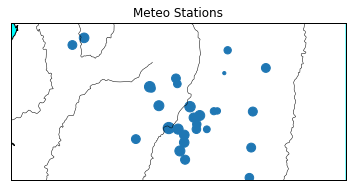

[605.1600000000001, 686.4399999999999, 778.41, 670.81, 835.2099999999999, 660.49, 691.69, 702.25, 691.69, 665.64, 686.4399999999999, 906.0100000000001, 1102.2400000000002, 712.89, 686.4399999999999, 441.0, 691.69, 1128.96, 979.69, 384.1600000000001, 1024.0, 1043.2899999999997, 900.0, 829.44, 605.1600000000001, 767.29, 712.89, 772.84, 729.0, 645.16, 488.4100000000001, 985.9599999999999, 660.49, 681.21, 566.44, 817.96, 817.96, 888.0400000000001, 519.84, 876.1600000000001, 457.9599999999999, 538.24, 268.96, 789.6100000000001, 515.29, 686.4399999999999]


In [2]:
import os
import math
import numpy as np
import calendar
import pylab as plt
import pandas as pd
from datetime import date
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.spatial.distance as ssd
from random import randint
from random import shuffle
import glob
from PIL import Image
import matplotlib.cm as cm
from ipywidgets import interact, widgets
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap



%matplotlib inline 


def add_months(sourcedate,months):
    month = sourcedate.month - 1 + months
    year = int(sourcedate.year + month / 12 )
    month = month % 12 + 1
    day = min(sourcedate.day,calendar.monthrange(year,month)[1])
    return datetime.date(year,month,day)



#path = './Data/Climat/data_cleaning/step2_monthly/'
path = '/mnt/hgfs/sharedKali/TB_Data_Meteo/outputs_yearly_v2_2011_2016/'

measures = ['average','tmax','tmin','rain']
years = ['2011','2012','2013','2014','2015','2016']
months = ['1','2','3','4','5','6','7','8','9','10','11','12']


chosenYear = years[5]
chosenMeasure = measures[3]

def loadClimatInfo(measure = 'rain', year = '2016', month = '1'):
    
    measure = str(measure)
    year = str(year)
    month = str(month)
    
    if(measure != 'average'):
        # Reading file
        records_matrix = open(path + '/' + measure + '/' + year + '/fold-1/' + measure + '_ris.csv')

        # Reading the data 
        matriceData =  [l.strip().split(',') for l in records_matrix.readlines()[1::]]
        records_matrix.seek(0)
        matriceInfo =  [l.strip().split(',') for l in records_matrix.readlines()[:1]]
        
        return(matriceInfo[0],matriceData)
    
    else:
        records_matrix = open(path + '/' + measure + '/dtr_' + year + '_' + month + '.asc')
        # Reading the data 
        matriceData =  [l.strip().split(' ') for l in records_matrix.readlines()[6::]]
        records_matrix.seek(0)
        matriceInfo =  [l.strip().split(' ') for l in records_matrix.readlines()[:5]]
        matriceData = np.array(matriceData)
        
        return (matriceInfo,matriceData)
        
        

# https://github.com/ipython/ipywidgets/blob/master/docs/source/examples/Index.ipynb


'''
interact(loadClimatInfo, measure=widgets.Dropdown(
    options={'average':'average','tmax':'tmax','tmin':'tmin','rain':'rain' },
    value='rain',
    description='Measure Type:'
), year=widgets.Dropdown(
    options={'2011': 2011, '2012': 2012, '2013': 2013, '2014': 2014, '2015': 2015, '2016': 2016 },
    value=2016,
    description='Measure Year:'
), month=widgets.Dropdown(
    options={'1':'1','2':'2','3':'3','4':'4','5':'5','6':'6','7':'7','8':'8','9':'9','10':'10','11':'11','12':'12'},
    value='1',
    description='Measure Month (AVG):'
)) 
'''

# Matrice is a tuple
matrice = loadClimatInfo('tmax','2016')
matriceInfo = np.array(matrice[0])
matriceData = np.array(matrice[1])



# Useless as addresses are not regirestered (works with NewYork but not with countryside)

def mapStations():
    
    geolocator = Nominatim()
    locations = []

    x=[] #longitudes
    y=[] #latitudes
    z=[] # rain
    
    
    for record in matriceData:
        #print record
        x.append(float(record[6]))
        y.append(float(record[7]))
        z.append(float(record[12])**2)
    
    OldMax = np.amax(z)
    OldMin = np.amin(z)
    NewMax = 150
    NewMin = 10
    z2range = np.array([])


    OldRange = float(OldMax - OldMin)  
    NewRange = float(NewMax - NewMin)

    
    for OldValue in z:
        NewValue = float(((OldValue - OldMin) * NewRange) / OldRange) + NewMin

        z2range = np.append(NewValue, z2range)

    z2range = z2range[::-1]
    
        
    #print locations
    #geolocator = Nominatim()
    #loc = geolocator.geocode("Pereira, Colombia")
    
    # http://www.openstreetmap.org/export#map=10/4.7379/-75.5310
    #m = Basemap(llcrnrlon=-77.0457,llcrnrlat=4.0273,urcrnrlon=-74.0163,urcrnrlat=5.4479, resolution='h',projection='merc')
    m = Basemap(llcrnrlon=-77.3080,llcrnrlat=4.4067,urcrnrlon=-74.2786,urcrnrlat=5.8264, resolution='h',projection='merc')
    
    x1,y1=m(x,y)
    
    print type(m)
    
    m.drawmapboundary(fill_color='cyan') # fill to edge
    m.drawcountries()
    m.drawcoastlines()
    m.drawrivers() # you may want to turn this off for larger areas like continents
    m.fillcontinents(color='white',lake_color='cyan',zorder=0)
    
        
    
    m.scatter(x1,y1,s=z2range,cmap=cm.jet,alpha=1.0)
    #m.scatter(x1,y1,s=5,cmap=cm.jet,alpha=1.0)

    plt.title("Meteo Stations") 
    plt.show()
    
    print z

    
# usefull: measuring distances: https://pypi.python.org/pypi/geopy

mapStations()

